# **Importing all necessary libraries (for both tasks)**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge,Ridge,LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# **Processing categorical variables**

## **For a task of processing categorical variables was chosen dataset 'Sleep Health and Lifestyle Dataset' from Kaggle:  https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset**

## **Analysing data with respect to categorical features**

**Whlie analysing, which categorical features are nominal, and which are order - it was discovered, that in this dataset one binary feature - 'Gender', one nominal feature - 'Occupation', one order feature - 'BMI Category', class label 'Sleep Disorder', which have 3 possible values, and feature called 'Blood Pressure', which in fact could be divided into two numeric features, corresponding to higher and lower blood pressure**

In [ ]:
df=pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
display(df)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
print(pd.unique(df['Gender']))
print(pd.unique(df['Occupation']))
print(pd.unique(df['BMI Category']))
print(pd.unique(df['Sleep Disorder']))

['Male' 'Female']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
[nan 'Sleep Apnea' 'Insomnia']


## **Processing feature 'Blood pressure', and dropping unnecessary features**

**Despite the fact, that this is not necessary to process feature 'Blood pressure', as long as it doesn't required into task, due to fact, that this feature generally not either order or nomial, it was processed, as long as ideally this should be done in real-world task. Also was removed feature 'Person ID', as long as it unique for each sample, and won't provide us any useful information.**

In [ ]:
df=df.drop(['Person ID'],axis=1)
df['Higher Pressure']=df['Blood Pressure'].str.split("/",expand=True)[0].astype('int64')
df['Lower Pressure']=df['Blood Pressure'].str.split("/",expand=True)[1].astype('int64')
df=df.drop(['Blood Pressure'], axis=1)
df=df.astype({'Higher Pressure':'int64','Lower Pressure':'int64'})
display(df)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Higher Pressure,Lower Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


## **Processing binary feature**

**Again, it doest't required in task, to process binary features, but this feature still was processed, as long as it could be done super easy, by compination of boolean masking and type transformation, and like before - generally it always must be processed.**

In [ ]:
df['Gender']=1*(df['Gender']=='Male')
df=df.astype({'Gender':'int64'})
display(df)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Higher Pressure,Lower Pressure
0,1,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,1,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,1,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,0,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


## **Class label's encoding**

**As it was mentioned before, target value in this dataset have only three values, so they were encoded with values 0,1,2 using map() method of DataFrame object**

In [ ]:
df[df['Sleep Disorder']!=df['Sleep Disorder']]['Sleep Disorder']='None'
class_mapping={'None':0,'Sleep Apnea':1,'Insomnia':2}
df['Sleep Disorder']=df['Sleep Disorder'].map(class_mapping)
display(df)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Higher Pressure,Lower Pressure
0,1,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,1,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,1,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1.0,140,90
4,1,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,1.0,140,95
370,0,59,Nurse,8.0,9,75,3,Overweight,68,7000,1.0,140,95
371,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,1.0,140,95
372,0,59,Nurse,8.1,9,75,3,Overweight,68,7000,1.0,140,95


## **Processing order feature**

**In order, to cope with categorical feature 'BMI Category',first of all, were equalizide values 'Normal Weight' and 'Normal', as long as, obviously, they are equal, by setting value 'Normal Weight' equal to 'Normal', then were created 2 new binary features: 'BMI > Normal', which indicates, that value of category is 'Overweight' or 'Obese', and 'BMI > Overweight', that indicates that value of category is 'Obese'**

In [ ]:
df[df['BMI Category']=="Normal Weight"]['BMI Category']='Normal'
df['BMI > Normal']=df['BMI Category'].apply(lambda x: 1 if x in {'Overweight','Obese'} else 0)
df['BMI > Overweight']=df['BMI Category'].apply(lambda x: 1 if x in {'Obese'} else 0)
df=df.drop(['BMI Category'],axis=1)
display(df)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Higher Pressure,Lower Pressure,BMI > Normal,BMI > Overweight
0,1,27,Software Engineer,6.1,6,42,6,77,4200,NaN,126,83,1,0
1,1,28,Doctor,6.2,6,60,8,75,10000,NaN,125,80,0,0
2,1,28,Doctor,6.2,6,60,8,75,10000,NaN,125,80,0,0
3,1,28,Sales Representative,5.9,4,30,8,85,3000,1.0,140,90,1,1
4,1,28,Sales Representative,5.9,4,30,8,85,3000,1.0,140,90,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,Nurse,8.1,9,75,3,68,7000,1.0,140,95,1,0
370,0,59,Nurse,8.0,9,75,3,68,7000,1.0,140,95,1,0
371,0,59,Nurse,8.1,9,75,3,68,7000,1.0,140,95,1,0
372,0,59,Nurse,8.1,9,75,3,68,7000,1.0,140,95,1,0


## **Processing nominal feature**

**To cope with nominal feature 'Occupation', simply was used pd.get_dummies() method, which switched 'Occupation' feature with several binary featureі, corresponding to each unique value of feature**

In [ ]:
cols=df.columns
df=pd.get_dummies(df,dtype='int64')
display(df)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Higher Pressure,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,27,6.1,6,42,6,77,4200,NaN,126,...,0,0,0,0,0,0,0,0,1,0
1,1,28,6.2,6,60,8,75,10000,NaN,125,...,1,0,0,0,0,0,0,0,0,0
2,1,28,6.2,6,60,8,75,10000,NaN,125,...,1,0,0,0,0,0,0,0,0,0
3,1,28,5.9,4,30,8,85,3000,1.0,140,...,0,0,0,0,0,1,0,0,0,0
4,1,28,5.9,4,30,8,85,3000,1.0,140,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,8.1,9,75,3,68,7000,1.0,140,...,0,0,0,0,1,0,0,0,0,0
370,0,59,8.0,9,75,3,68,7000,1.0,140,...,0,0,0,0,1,0,0,0,0,0
371,0,59,8.1,9,75,3,68,7000,1.0,140,...,0,0,0,0,1,0,0,0,0,0
372,0,59,8.1,9,75,3,68,7000,1.0,140,...,0,0,0,0,1,0,0,0,0,0


## **Analyzing final DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Sleep Disorder                   155 non-null    float64
 9   Higher Pressure                  374 non-null    int64  
 10  Lower Pressure                   374 non-null    int64  
 11  BMI > Normal                     374 non-null    int64  
 12  BMI > Overweight      

# **Processing missed values**

## **For a task of filling missed values was chosen 'Credit Risk Dataset' from Kaggle: https://www.kaggle.com/datasets/laotse/credit-risk-dataset**

## **Analyzing dataset with respect to missing values, and making all necessary processing, which will be necessary for further tasks**

**While analyzing dataset, it was discovered, that it have only 2 columns with missing values, ant that both of this features - numeric. Also it was discovered, that in this dataset several features with categorical values, which were encoded almost in the same way, as it was in previous task, and that this dataset is for binary classification task, where classes are imbalanced, so it makes sense to use F1-score as a measure, for evaluating quality of imputers in future.**

In [ ]:
df=pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
display(df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
print(pd.unique(df['person_home_ownership']))
print(pd.unique(df['loan_intent']))
print(pd.unique(df['loan_grade']))
print(pd.unique(df['cb_person_default_on_file']))

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['D' 'B' 'C' 'A' 'E' 'F' 'G']
['Y' 'N']


In [ ]:
df['cb_person_default_on_file']=(df['cb_person_default_on_file']=='Y').astype('int64')
df['loan_grade>G']=df['loan_grade'].apply(lambda x: 1 if x in {'A','B','C','D','E','F'} else 0)
df['loan_grade>F']=df['loan_grade'].apply(lambda x: 1 if x in {'A','B','C','D','E'} else 0)
df['loan_grade>E']=df['loan_grade'].apply(lambda x: 1 if x in {'A','B','C','D'} else 0)
df['loan_grade>D']=df['loan_grade'].apply(lambda x: 1 if x in {'A','B','C'} else 0)
df['loan_grade>C']=df['loan_grade'].apply(lambda x: 1 if x in {'A','B'} else 0)
df['loan_grade>B']=df['loan_grade'].apply(lambda x: 1 if x in {'A'} else 0)
df=df.drop(['loan_grade'],axis=1)
df=pd.get_dummies(df,dtype='int64')
display(df)
df.info()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade>G,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,35000,16.02,1,0.59,1,3,1,...,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,1,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,1,...,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,1,...,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,1,...,1,0,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,0,28,1,...,0,0,0,1,0,0,1,0,0,0
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,1,...,1,0,0,0,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               31686 non-null  float64
 3   loan_amnt                       32581 non-null  int64  
 4   loan_int_rate                   29465 non-null  float64
 5   loan_status                     32581 non-null  int64  
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_default_on_file       32581 non-null  int64  
 8   cb_person_cred_hist_length      32581 non-null  int64  
 9   loan_grade>G                    32581 non-null  int64  
 10  loan_grade>F                    32581 non-null  int64  
 11  loan_grade>E                    32581 non-null  int64  
 12  loan_grade>D                    

In [ ]:
display(df[df['loan_status']==1])
display(df[df['loan_status']==0])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade>G,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,35000,16.02,1,0.59,1,3,1,...,0,0,0,1,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,1,...,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,1,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,2.0,2500,7.14,1,0.25,0,2,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,0.0,7000,16.82,1,0.10,1,24,1,...,0,0,0,1,0,1,0,0,0,0
32565,57,40000,1.0,15000,8.90,1,0.38,0,21,1,...,0,0,0,1,0,0,0,1,0,0
32571,60,45600,1.0,20000,10.00,1,0.44,0,26,1,...,0,0,0,1,0,0,0,0,0,1
32574,52,65004,4.0,20000,15.58,1,0.31,1,19,1,...,0,0,0,1,0,0,0,0,1,0


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade>G,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,1000,11.14,0,0.10,0,2,1,...,0,0,1,0,0,1,0,0,0,0
14,23,115000,2.0,35000,7.90,0,0.30,0,4,1,...,0,0,0,1,0,1,0,0,0,0
15,23,500000,7.0,30000,10.65,0,0.06,0,3,1,...,1,0,0,0,1,0,0,0,0,0
16,23,120000,0.0,35000,7.90,0,0.29,0,4,1,...,0,0,0,1,0,1,0,0,0,0
20,25,162500,2.0,35000,7.49,0,0.22,0,4,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0.0,5000,11.26,0,0.08,0,20,1,...,0,0,0,1,0,1,0,0,0,0
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,1,...,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,1,...,1,0,0,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,1,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
y=df['loan_status'].values
X=df.drop(['loan_status'],axis=1).values
print(y)
print(X)

[1 0 1 ... 1 0 0]
[[2.20e+01 5.90e+04 1.23e+02 ... 0.00e+00 1.00e+00 0.00e+00]
 [2.10e+01 9.60e+03 5.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.50e+01 9.60e+03 1.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 ...
 [6.50e+01 7.60e+04 3.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.60e+01 1.50e+05 5.00e+00 ... 0.00e+00 1.00e+00 0.00e+00]
 [6.60e+01 4.20e+04 2.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]]


## **Choosing classifiers, parameters of imputers and implementing methods for proper usage and evaluation of them**

**As a classifier for futher evaluation of imputers - GradientBoostingClassifier was choosen, with some limitations on depth of trees number of features.**

In [ ]:
classifier=GradientBoostingClassifier(max_depth=4,max_features=12,random_state=0)

In [ ]:
def get_scores_for_imputer(imputer,X_missing,y_missing,N_SPLITS=5):
    estimator = make_pipeline(imputer,classifier)
    impute_scores = cross_val_score(estimator,X_missing,y_missing,scoring='f1',cv=N_SPLITS)
    return impute_scores

In [ ]:
def get_impute_iterative(X_missing,y_missing,regressor):
    imputer = IterativeImputer(estimator=regressor)
    iterative_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

In [ ]:
def get_impute_simple(X_missing,y_missing,strategy):
    imputer = SimpleImputer(strategy=strategy)
    simple_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return simple_impute_scores.mean(), simple_impute_scores.std()

In [ ]:
def get_impute_knn(X_missing,y_missing):
    imputer = KNNImputer()
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()

**Speaking about parameters of imputers, as a strategies for SimpleImputer were choosen filling missing values with mean value or median, while as estimators for IterativeImputor were choosen BayesianRidge, GradientBoostingRegressor, KNeighborsRegressor, pipeline with Nystroem's kernel approximation and Ridge regression and as a final regressor - ordinary linear regression.**

In [ ]:
f1s=np.zeros(shape=8)
stds=np.zeros(shape=8)
f1s[0],stds[0]=get_impute_simple(X,y,'mean')
print(f1s[0],stds[0])
f1s[1],stds[1]=get_impute_simple(X,y,'median')
print(f1s[1],stds[1])
f1s[2],stds[2]=get_impute_knn(X,y)
print(f1s[2],stds[2])
f1s[3],stds[3]=get_impute_iterative(X,y,BayesianRidge())
print(f1s[3],stds[3])
f1s[4],stds[4]=get_impute_iterative(X,y,GradientBoostingRegressor(max_depth=4,max_features=12))
print(f1s[4],stds[4])
f1s[5],stds[5]=get_impute_iterative(X,y,KNeighborsRegressor())
print(f1s[5],stds[5])
f1s[6],stds[6]=get_impute_iterative(X,y,make_pipeline(Nystroem(kernel="polynomial",degree=2,random_state=0),Ridge(alpha=1e2)))
print(f1s[6],stds[6])
f1s[7],stds[7]=get_impute_iterative(X,y,LinearRegression(fit_intercept=True))
print(f1s[7],stds[7])

0.8078664947552712 0.0358540758538727
0.8072133275901621 0.03560786890808871
0.8103595880592069 0.03690672908793472
0.8122877602145877 0.03478506835863296
0.810758391320951 0.03696021010253206
0.81243102996462 0.03757704720498577
0.8111683196136635 0.03750432060294527
0.8118666904257287 0.03698726536901405


## **Visualizing values of quality measure for different algorithms**

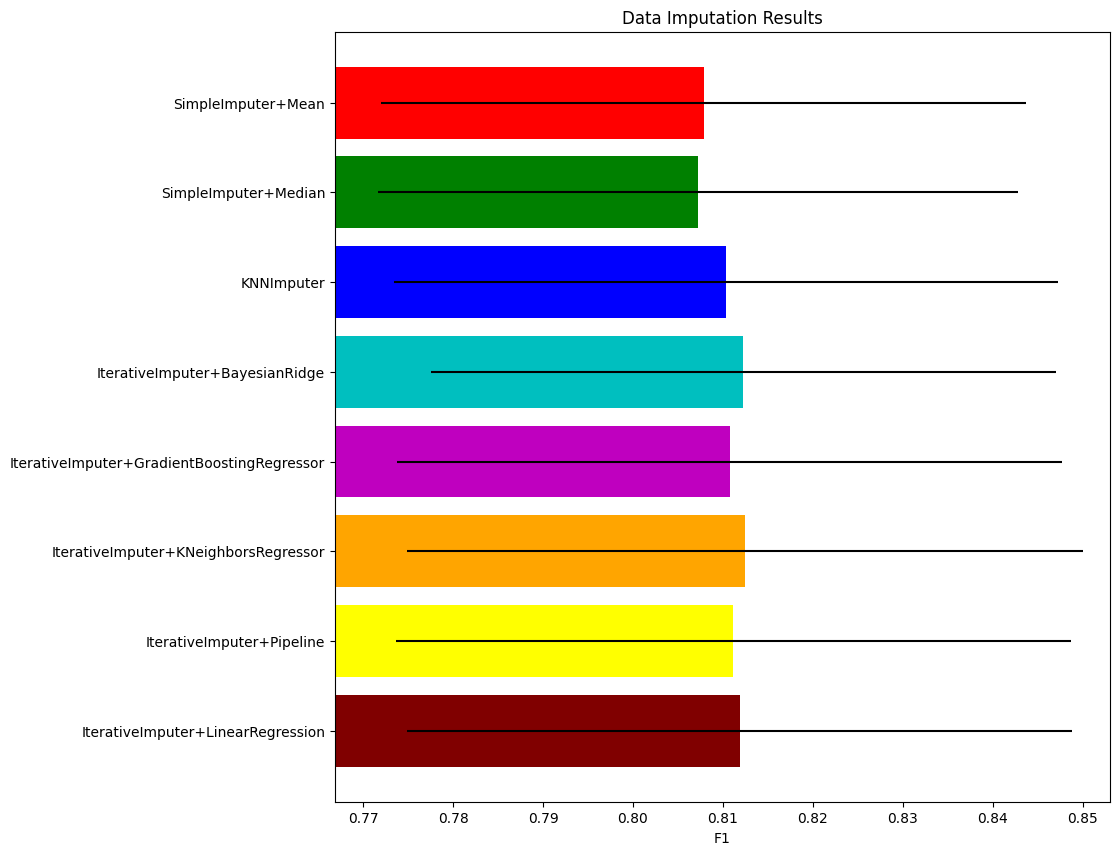

In [ ]:
n_bars = len(f1s)
colors = ["r", "g", "b", "c", "m",'orange','yellow','maroon']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
for j in range(n_bars):
    ax.barh(j,f1s[j],xerr=stds[j],color=colors[j],align="center")
ax.set_title("Data Imputation Results")
ax.set_xlim(left=np.min(f1s)* 0.95,right=np.max(f1s)*1.05)
ax.set_yticks(range(n_bars))
ax.set_xlabel("F1")
ax.invert_yaxis()
x_labels=['SimpleImputer+Mean','SimpleImputer+Median','KNNImputer','IterativeImputer+BayesianRidge','IterativeImputer+GradientBoostingRegressor','IterativeImputer+KNeighborsRegressor','IterativeImputer+Pipeline','IterativeImputer+LinearRegression']
ax.set_yticklabels(x_labels)
plt.show()